In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image 

In [2]:
img_path = "test.jpg"    #"5.jpg"

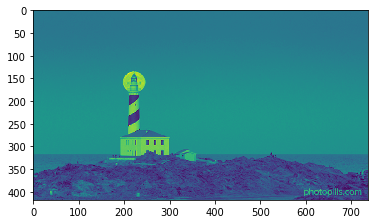

In [3]:
img = cv2.imread(img_path, 0)
plt.imshow(img)

# Threshold

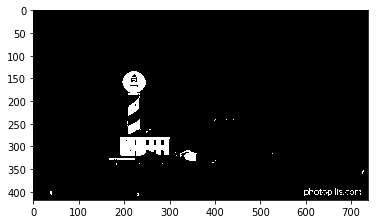

In [12]:
ret, thresh = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
plt.imshow(thresh,cmap='gray')

# Find blobs / connected components 

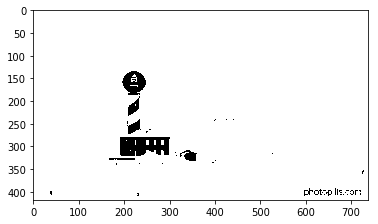

In [13]:
#find all your connected components (white blobs in your image)
nb_components, output, stats, centroids = cv2.connectedComponentsWithStats((thresh), connectivity=8)
sizes = stats[1:, -1]; nb_components = nb_components - 1

# minimum & maximum size of particles we want to keep (number of pixels)

min_size = 0
max_size = 7000000

img2 = np.zeros((output.shape))
#for every component in the image, you keep it only if it's above min_size & less than max_size
for i in range(0, nb_components):
    if sizes[i] >= min_size and sizes[i] <= max_size:
        img2[output == i + 1] = 255
        
       
#plt.figure(frameon=False)
#plt.axis('off')
#plt.xticks([])
#plt.yticks([])        
plt.imshow(cv2.bitwise_not(img2),cmap='gray') 
plt.savefig( "negative_" + img_path.split('.')[0] + ".png" , dpi = 300,bbox_inches='tight', pad_inches=0)
plt.show()
plt.close()

In [14]:
filter_size = 3
bb_image = cv2.GaussianBlur((img2),(filter_size,filter_size),0)
# find contours and get the external one
image, contours, hier = cv2.findContours(bb_image.astype('uint8'), cv2.RETR_TREE,
cv2.CHAIN_APPROX_SIMPLE)

In [15]:
cut_off = 0.0005*(img.shape[0]*img.shape[1])

# mark bounding box

In [16]:
#cut_off = 2000
signature_list = []
for c in contours:
    # get the bounding rect
    x, y, w, h = cv2.boundingRect(c)
    #print(x , " ", y , " ", w , " ",h)
    if (w*h)>cut_off:  # 
        print(x , " ", y , " ", w , " ",h)
        # draw a rectangle to visualize 
        cv2.rectangle(bb_image, (x, y), (x+w, y+h),(255, 255, 0), 2)
        signature_list.append([y,y+h,x,x+w])

683   395   41   13
619   393   44   17
669   392   13   15
597   391   21   20
166   324   62   6
321   304   42   30
189   275   114   47
207   236   33   38
196   134   53   103


In [17]:
plt.figure(frameon=False)
plt.axis('off')
plt.xticks([])
plt.yticks([])
plt.imshow(bb_image,cmap='gray')
plt.savefig( "marked_" + img_path.split('.')[0] + ".png" , dpi = 300, bbox_inches='tight', pad_inches=0)
plt.close()

# extract probable blobs

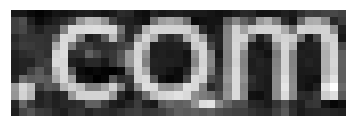

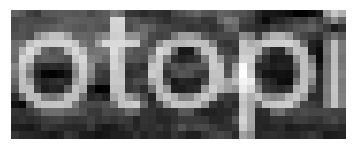

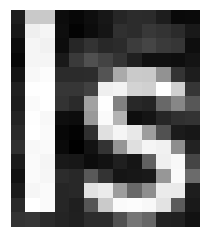

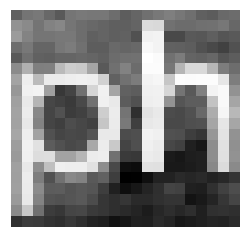

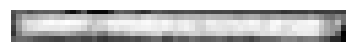

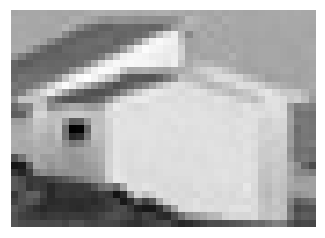

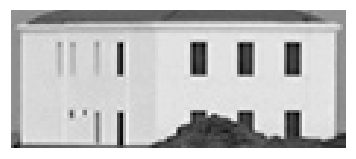

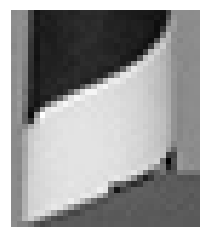

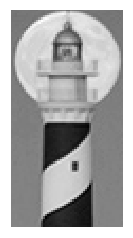

In [18]:
for i in range (0,len(signature_list)):     
    plt.figure(frameon=False)
    plt.axis('off')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[signature_list[i][0]:signature_list[i][1] ,signature_list[i][2]:signature_list[i][3]],cmap='gray')
    plt.savefig( "extracted_" + str(i) + ".png" , dpi = 300, bbox_inches='tight', pad_inches=0)
    #plt.close()

# classifier 

In [19]:
%matplotlib inline
import os
import random
#import Pickle as pickle
import numpy as np
import matplotlib.pyplot
from matplotlib.pyplot import imshow
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.models import Model
from sklearn.decomposition import PCA
from scipy.spatial import distance
#from tqdm import tqdm

Using TensorFlow backend.


In [20]:
model = keras.applications.VGG16(weights='imagenet', include_top=True)
#model = keras.applications.inception_v3.InceptionV3(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
#model.summary()

In [21]:
# get_image will return a handle to the image itself, and a numpy array of its pixels to input the network
def get_image(path):
    img = image.load_img(path, target_size=model.input_shape[1:3])
    #img = image.load_img(path, target_size=[299,299])
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

predicted coil with probability 0.361
predicted beacon with probability 0.312
predicted soap_dispenser with probability 0.032
predicted spotlight with probability 0.029
predicted photocopier with probability 0.017


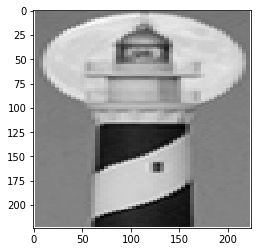

In [22]:
#path = "classic_example/extracted_0.png"
path = "extracted_8.png"


img, x = get_image(path)
predictions = model.predict(x)
imshow(img)
for pred in decode_predictions(predictions)[0]:
    print("predicted %s with probability %0.3f" % (pred[1], pred[2]))

predicted planetarium with probability 0.108
predicted boathouse with probability 0.101
predicted church with probability 0.080
predicted dome with probability 0.069
predicted cinema with probability 0.057


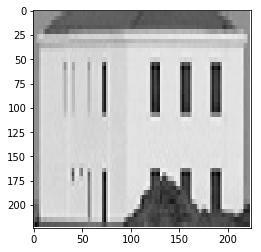

In [25]:
path = "extracted_6.png"

img, x = get_image(path)
predictions = model.predict(x)
imshow(img)
for pred in decode_predictions(predictions)[0]:
    print("predicted %s with probability %0.3f" % (pred[1], pred[2]))